# Data Science Classification Model Task

**Objective:**

Develop a classification model using the provided dataset. The primary goal is to predict the 'Y’ variable accurately using features named with 'X'.

 

**Dataset Overview:**

 

The dataset includes multiple features, all starting with 'x' (e.g., x1, x2, x3, etc.), and a target variable 'y'.

Features represent ratings (1 to 10) how each person agree with certain attitude/statement, while ‘y’ contains their segment in which they belong.

## Importing dataset

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("input_data.csv")

In [3]:
df

,x3,x5,x6,x7,x8,x9,x10,x11,x12,x13,...,x21,x23,x24,x25,x26,x27,x28,x29,x30,y
0,1,5,5,5,6,5,5,5,6,5,...,6,4,5,5,5,5,5,5,5,11
1,4,6,6,4,4,6,6,6,6,5,...,6,3,3,3,3,3,3,3,2,22
2,3,6,6,5,6,4,6,3,5,4,...,6,4,4,5,4,3,4,3,3,22
3,5,4,5,5,5,3,4,3,4,4,...,4,4,4,4,4,4,5,3,4,22
4,2,6,6,3,5,1,6,3,6,1,...,6,2,3,3,1,4,3,4,4,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,2,6,5,6,6,5,6,5,6,4,...,5,4,5,5,4,5,5,4,5,22
2379,2,4,4,4,4,6,6,4,6,3,...,5,2,4,3,4,4,4,5,4,22
2380,4,4,4,3,3,3,4,3,3,2,...,3,3,3,3,3,3,3,2,3,22
2381,4,5,6,3,6,5,4,3,5,5,...,5,3,2,2,1,3,2,2,2,22



Essentially, we have features representing ratings that individuals give on specific items, and a target variable indicating the group to which each individual belongs. Our goal is to use these ratings to predict which group an individual belongs to.

In [4]:
X=df.drop(columns=['y'])
y= df['y']

In [5]:
X.describe()

,x3,x5,x6,x7,x8,x9,x10,x11,x12,x13,...,x20,x21,x23,x24,x25,x26,x27,x28,x29,x30
count,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,...,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000,2383.000000
mean,2.694922,4.764582,4.854805,4.678137,4.875787,4.956358,5.036089,3.873689,4.653798,3.976081,...,3.738145,4.519094,3.662610,3.827109,3.976081,3.788922,3.848510,4.048678,3.781788,3.958456
std,1.296059,1.148308,1.087244,1.185933,1.094455,1.186168,1.107356,1.448092,1.401598,1.426279,...,1.504067,1.437602,0.915107,0.875731,0.838223,0.896590,0.885159,0.830858,0.870384,0.848490
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000
50%,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,5.000000,...,5.000000,6.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000
max,8.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We can see that there are no outliers and no wrong values cause the values are within correct range (1,10).

## Class distribution

In [6]:
b = y.value_counts()
b

11    1093
22     750
33     249
12     123
21      61
32      52
23      29
13      18
31       8
Name: y, dtype: int64

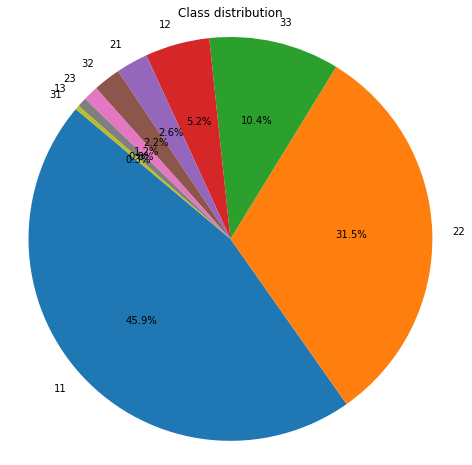

In [7]:
import matplotlib.pyplot as plt

labels = ['11', '22', '33', '12', '21', '32', '23', '13', '31']
sizes = [1093, 750, 249, 123, 61, 52, 29, 18, 8]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Class distribution')
plt.show()

This requires the implementation of techniques for handling imbalanced classes, so later, after splitting the data into training and test sets, oversampling will be performed.

## Missing values

In [8]:
print(df.isnull().sum())

x3     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
y      0
dtype: int64


In [9]:
data_types = df.dtypes
non_numeric_columns = data_types[data_types != 'int64'] 
if len(non_numeric_columns) > 0:
    print("There are non numerical columns.")
    print(non_numeric_columns)
else:
    print("There are only numerical values in Dataframe!")

There are only numerical values in Dataframe!


This was double checking, cause sometimes it can happen that there are some weird caracters representing NaN/missing values, that can not be recognized with isna or similar checkings.

I could see that that is not the case in my Dataframe, but what if I had a huge database that there was no way to check manuelly something like this.

## Correlation

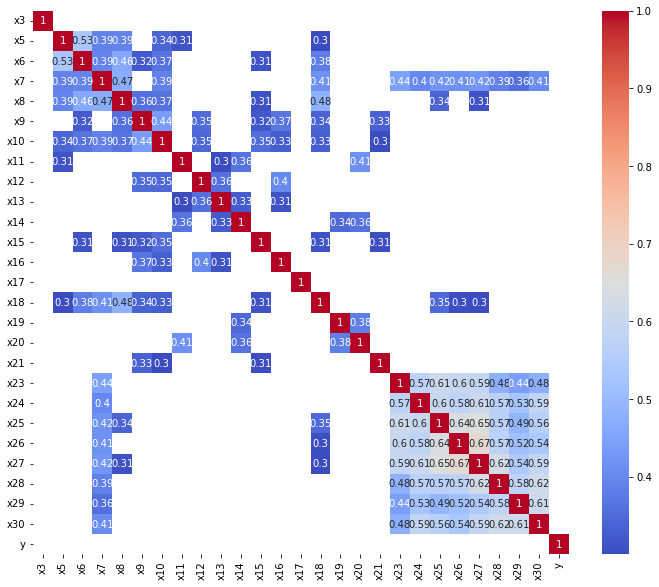

In [10]:
import seaborn as sns

matrix = df.corr()

threshold = 0.3

corr = matrix.abs() > threshold
matrix_corr = matrix[corr]

plt.figure(figsize=(12, 10))

sns.heatmap(matrix_corr, annot=True, cmap='coolwarm')

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

## Feature selection and importance

Index(['x3', 'x7', 'x11', 'x13', 'x14', 'x17', 'x19', 'x20'], dtype='object')


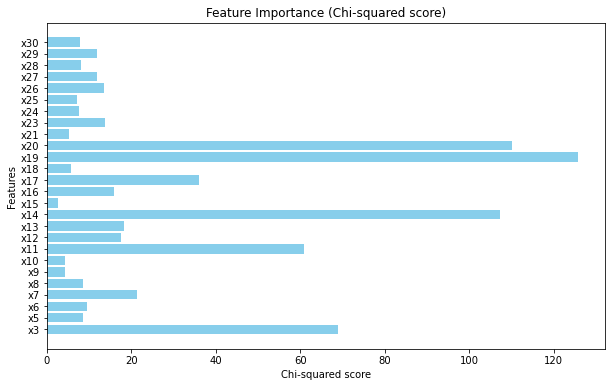

In [11]:
from sklearn.feature_selection import SelectKBest, chi2

k = 8

selector = SelectKBest(score_func=chi2, k=k)

X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

print(selected_features)

scores = selector.scores_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, scores, color='skyblue')
plt.xlabel('Chi-squared score')
plt.ylabel('Features')
plt.title('Feature Importance (Chi-squared score)')
plt.show()


Chi-square (χ²) test is a statistical test used to check for independence between categorical variables. 
This test measures how much the actual frequencies of
occurrence of a characteristic
differ from the expected frequencies under the assumption 
that the variables are independent.

**Most important features:** x3, x11, x14, x19, x20

## Splitting the data into train and test

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## Oversampling

In [13]:
from imblearn.over_sampling import RandomOverSampler


oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
y_resampled.value_counts()

21    874
32    874
22    874
11    874
13    874
33    874
12    874
23    874
31    874
Name: y, dtype: int64

This is the solution for imbalanced class distribution.


Oversampling should be done only on the training set. This is to avoid data leakage and to properly evaluate the model on an independent test set.

## PCA - data visuelization

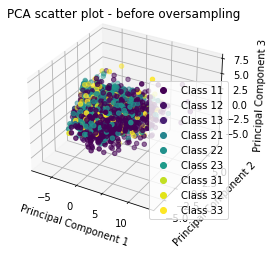

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_train)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

handles, labels = scatter.legend_elements()
unique_labels = np.unique(y_train)
legend_labels = [f'Class {label}' for label in unique_labels]
legend = ax.legend(handles, legend_labels)
ax.text2D(0.5, 0.95, "PCA scatter plot - before oversampling", transform=ax.transAxes, fontsize=12, ha='center')


plt.show()


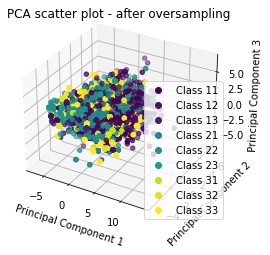

In [15]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_resampled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_resampled)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

handles, labels = scatter.legend_elements()
unique_labels = np.unique(y_train)
legend_labels = [f'Class {label}' for label in unique_labels]
legend = ax.legend(handles, legend_labels)
ax.text2D(0.5, 0.95, "PCA scatter plot - after oversampling", transform=ax.transAxes, fontsize=12, ha='center')

plt.show()


# Model Building with the help of GridSearchCV

### Random Forest 

In [16]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


param_grid_forest = {
    'n_estimators': [100, 200], 
    'max_depth': [None, 5],  
    'min_samples_split': [10, 15], 
}

gss = GridSearchCV(RandomForestClassifier(),
             param_grid=param_grid_forest,
             scoring='accuracy',
             cv=4,
             verbose=5)

In [17]:
gss.fit(X_train, y_train)
print(gss.best_estimator_)
print(gss.best_score_)
print(gss.best_params_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4] END max_depth=None, min_samples_split=10, n_estimators=100;, score=0.516 total time=   0.1s
[CV 2/4] END max_depth=None, min_samples_split=10, n_estimators=100;, score=0.528 total time=   0.1s
[CV 3/4] END max_depth=None, min_samples_split=10, n_estimators=100;, score=0.527 total time=   0.1s
[CV 4/4] END max_depth=None, min_samples_split=10, n_estimators=100;, score=0.511 total time=   0.1s
[CV 1/4] END max_depth=None, min_samples_split=10, n_estimators=200;, score=0.526 total time=   0.3s
[CV 2/4] END max_depth=None, min_samples_split=10, n_estimators=200;, score=0.530 total time=   0.3s
[CV 3/4] END max_depth=None, min_samples_split=10, n_estimators=200;, score=0.521 total time=   0.3s
[CV 4/4] END max_depth=None, min_samples_split=10, n_estimators=200;, score=0.527 total time=   0.3s
[CV 1/4] END max_depth=None, min_samples_split=15, n_estimators=100;, score=0.524 total time=   0.1s
[CV 2/4] END max_depth=None, mi

In [18]:
gss.fit(X_resampled, y_resampled)
acc_train_rf=gss.best_score_
print(acc_train_rf)
print(gss.best_params_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4] END max_depth=None, min_samples_split=10, n_estimators=100;, score=0.920 total time=   0.4s
[CV 2/4] END max_depth=None, min_samples_split=10, n_estimators=100;, score=0.925 total time=   0.4s
[CV 3/4] END max_depth=None, min_samples_split=10, n_estimators=100;, score=0.934 total time=   0.4s
[CV 4/4] END max_depth=None, min_samples_split=10, n_estimators=100;, score=0.959 total time=   0.4s
[CV 1/4] END max_depth=None, min_samples_split=10, n_estimators=200;, score=0.923 total time=   0.9s
[CV 2/4] END max_depth=None, min_samples_split=10, n_estimators=200;, score=0.932 total time=   0.9s
[CV 3/4] END max_depth=None, min_samples_split=10, n_estimators=200;, score=0.936 total time=   0.9s
[CV 4/4] END max_depth=None, min_samples_split=10, n_estimators=200;, score=0.955 total time=   0.9s
[CV 1/4] END max_depth=None, min_samples_split=15, n_estimators=100;, score=0.912 total time=   0.4s
[CV 2/4] END max_depth=None, mi

In [19]:
rf = RandomForestClassifier(max_depth= None, min_samples_split=10,n_estimators= 200)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(min_samples_split=10, n_estimators=200)

In [20]:
y_pred_rf = rf.predict(X_test)


In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred_rf)


array([[178,   0,   2,   0,  37,   0,   0,   0,   2],
       [ 15,   1,   0,   0,   8,   0,   0,   0,   1],
       [  2,   0,   0,   0,   2,   0,   0,   0,   0],
       [  7,   0,   0,   0,   5,   0,   0,   0,   0],
       [ 77,   2,   3,   0,  67,   0,   0,   0,   1],
       [  6,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   1,   0,   5,   0,   0,   0,   0],
       [ 28,   0,   1,   0,  19,   0,   0,   0,   2]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score

acc_rf=accuracy_score(y_test, y_pred_rf)
acc_rf

0.519916142557652

### Gradient Boosting

In [23]:
param_grid_gradient = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4]
}


gs = GridSearchCV(GradientBoostingClassifier(),
             param_grid=param_grid_gradient,
             scoring='accuracy',
             cv=4,
             verbose=5)

In [24]:
gs.fit(X_train, y_train)


Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 1/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.491 total time=   1.8s
[CV 2/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.484 total time=   1.8s
[CV 3/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.527 total time=   1.8s
[CV 4/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.468 total time=   1.8s
[CV 1/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200;, score=0.503 total time=   3.7s
[CV 2/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200;, score=0.478 total time=   3.7s
[CV 3/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200;, score=0.502 total time=   3.7s
[CV 4/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200;, score=0.466 total time=   3.7s
[CV 1/4] EN

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=5)

In [25]:
print(gs.best_score_)
print(gs.best_params_)

0.5094515793738879
{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [26]:
gs.fit(X_resampled, y_resampled)


Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 1/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.841 total time=   5.9s
[CV 2/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.842 total time=   6.0s
[CV 3/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.841 total time=   6.1s
[CV 4/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100;, score=0.848 total time=   6.0s
[CV 1/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200;, score=0.874 total time=  11.7s
[CV 2/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200;, score=0.872 total time=  11.8s
[CV 3/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200;, score=0.878 total time=  11.8s
[CV 4/4] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200;, score=0.900 total time=  11.7s
[CV 1/4] EN

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=5)

In [27]:
acc_train_grad=gs.best_score_
print(acc_train_grad)
print(gs.best_params_)

0.9283019128954297
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [28]:
gradient=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,min_samples_split=4,n_estimators=200)
gradient.fit(X_resampled, y_resampled)
y_pred_grad = gradient.predict(X_test)
print(confusion_matrix(y_test,y_pred_grad))
acc_grad=accuracy_score(y_test, y_pred_grad)
print(acc_grad)

[[172   2   2   1  34   0   0   0   8]
 [ 15   2   0   0   7   0   0   0   1]
 [  1   0   0   0   3   0   0   0   0]
 [  7   0   0   0   4   0   0   0   1]
 [ 74   1   3   0  64   0   0   1   7]
 [  4   0   0   0   2   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  5   0   1   0   4   0   0   0   0]
 [ 26   1   1   0  17   0   0   0   5]]
0.5094339622641509


### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

dtt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)

In [30]:
dtt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5]})

In [31]:
print(dtt.best_score_)
print(dtt.best_params_)

0.41920270437399515
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}


In [32]:
dtt.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5]})

In [33]:
acc_train_dt=dtt.best_score_
print(acc_train_dt)
print(dtt.best_params_)

0.9057995025651258
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}


In [34]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=20, min_samples_split= 2)
dt.fit(X_resampled, y_resampled)
y_pred_dt = gradient.predict(X_test)
print(confusion_matrix(y_test,y_pred_dt))
acc_dt=accuracy_score(y_test, y_pred_grad)
print(acc_dt)

[[172   2   2   1  34   0   0   0   8]
 [ 15   2   0   0   7   0   0   0   1]
 [  1   0   0   0   3   0   0   0   0]
 [  7   0   0   0   4   0   0   0   1]
 [ 74   1   3   0  64   0   0   1   7]
 [  4   0   0   0   2   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  5   0   1   0   4   0   0   0   0]
 [ 26   1   1   0  17   0   0   0   5]]
0.5094339622641509


In [35]:
from sklearn.metrics import precision_score, recall_score

precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

precision_grad = precision_score(y_test, y_pred_grad, average='weighted')
recall_grad = recall_score(y_test, y_pred_grad, average='weighted')

precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')


C:\Users\raden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raden\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Analysis of the model's performances

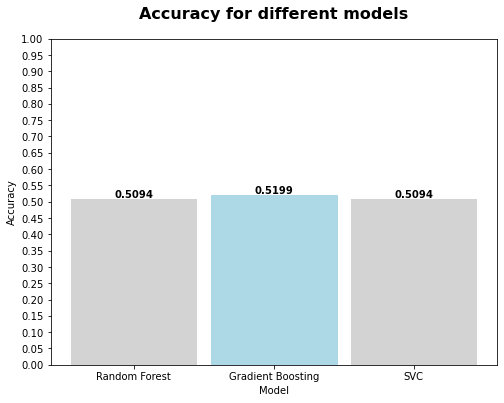

In [36]:
models = ['Random Forest', 'Gradient Boosting','SVC']

accuracy_scores = [acc_grad,acc_rf,acc_dt]
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracy_scores, width=0.9, color=['lightgray', 'lightgray','lightgray'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy for different models',fontsize=16, fontweight='bold', pad=20)
plt.ylim([0, 1])  
plt.yticks([i/100 for i in range(0, 101, 5)])
max_index = accuracy_scores.index(max(accuracy_scores))
bars[max_index].set_color('lightblue')
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.005, f'{v:.4f}', ha='center', color='black', fontweight='bold')

plt.show()

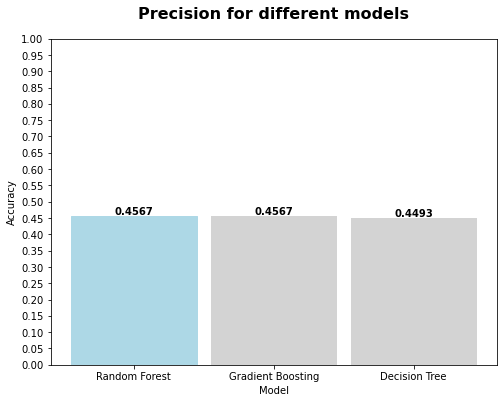

In [37]:
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']

precision_scores = [precision_rf,precision_rf,precision_dt]
plt.figure(figsize=(8, 6))
bars = plt.bar(models, precision_scores, width=0.9, color=['lightgray', 'lightgray','lightgray'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Precision for different models',fontsize=16, fontweight='bold', pad=20)
plt.ylim([0, 1])  
plt.yticks([i/100 for i in range(0, 101, 5)])
max_index = precision_scores.index(max(precision_scores))
bars[max_index].set_color('lightblue')
for i, v in enumerate(precision_scores):
    plt.text(i, v + 0.005, f'{v:.4f}', ha='center', color='black', fontweight='bold')

plt.show()

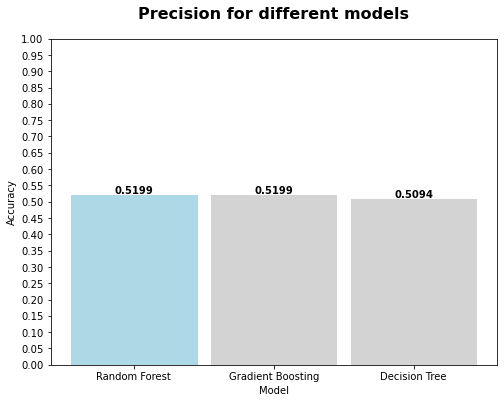

In [38]:
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']

recall_scores = [recall_rf,recall_rf,recall_dt]
plt.figure(figsize=(8, 6))
bars = plt.bar(models, recall_scores, width=0.9, color=['lightgray', 'lightgray','lightgray'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Precision for different models',fontsize=16, fontweight='bold', pad=20)
plt.ylim([0, 1])  
plt.yticks([i/100 for i in range(0, 101, 5)])
max_index = recall_scores.index(max(recall_scores))
bars[max_index].set_color('lightblue')
for i, v in enumerate(recall_scores):
    plt.text(i, v + 0.005, f'{v:.4f}', ha='center', color='black', fontweight='bold')

plt.show()

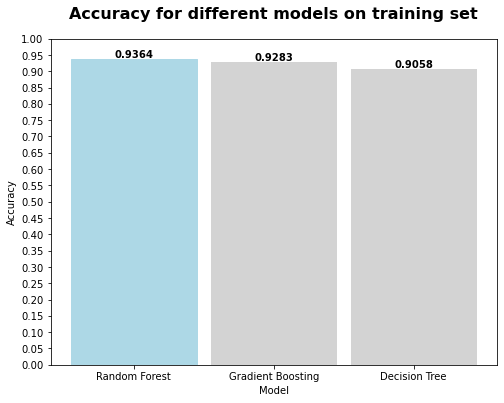

In [47]:
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']

recall_scores = [acc_train_rf,acc_train_grad,acc_train_dt]
plt.figure(figsize=(8, 6))
bars = plt.bar(models, recall_scores, width=0.9, color=['lightgray', 'lightgray','lightgray'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy for different models on training set',fontsize=16, fontweight='bold', pad=20)
plt.ylim([0, 1])  
plt.yticks([i/100 for i in range(0, 101, 5)])
max_index = recall_scores.index(max(recall_scores))
bars[max_index].set_color('lightblue')
for i, v in enumerate(recall_scores):
    plt.text(i, v + 0.005, f'{v:.4f}', ha='center', color='black', fontweight='bold')

plt.show()

In [ ]:
import seaborn as sns

# Vizualizacija matrice konfuzije za Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Vizualizacija matrice konfuzije za Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Vizualizacija matrice konfuzije za Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gradient, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
